In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the ols function
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
ad_conversion = pd.read_excel('ad_conversion.xlsx')


In [ ]:
ad_conversion.set_index('Month', inplace=True)


In [ ]:
ad_conversion

In [ ]:
ad_conversion.info()

In [ ]:
ad_conversion['log_n_impression'] = np.log(ad_conversion['n_impressions'])


In [ ]:
ad_conversion.head(2)

In [ ]:
# # Pembagian data / SPLIT
train_data = ad_conversion[:'2021-12-31']
test_data = ad_conversion['2022-01-01':]

In [ ]:
target_col = 'n_clicks'
pred_col = ['spent_usd','n_impressions','log_n_impression']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # Import SVR
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor  # Import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    absolute_percentage_errors = abs((actual - predicted) / actual)
    mape = (sum(absolute_percentage_errors) / len(actual)) * 100
    formatted_mape = "{:.2f}".format(mape)  # Format to have 2 decimal places
    return formatted_mape
    # return mape

# Define the predictor (X) and target (Y) variables
X = train_data [pred_col]
y = train_data[target_col]

y_log = np.log1p(y)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X, y_log)
lr_y_log_train_pred = lr_model.predict(X)  # Predictions on training data
lr_y_train_pred = np.expm1(lr_y_log_train_pred)

X_testing = test_data[pred_col]
y_testing = test_data[target_col]
lr_y_log_test_pred = lr_model.predict(X_testing)
lr_y_test_pred = np.expm1(lr_y_log_test_pred)

# # Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_log)
poly_y_log_train_pred = poly_model.predict(X_poly)  # Predictions on training data
poly_y_train_pred = np.expm1(poly_y_log_train_pred)

X_testing = test_data[pred_col]
X_testing_poly = poly_features.fit_transform(X_testing)
y_testing = test_data[target_col]
poly_y_log_testing_pred = poly_model.predict(X_testing_poly)
poly_y_test_pred = np.expm1(poly_y_log_testing_pred)


# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=400, random_state=42)
rf_model.fit(X, y_log)
rf_y_log_train_pred = rf_model.predict(X)  # Predictions on training data
rf_y_train_pred = np.expm1(rf_y_log_train_pred)

X_testing = test_data[pred_col]
y_testing = test_data[target_col]
rf_y_log_testing_pred = rf_model.predict(X_testing)
rf_y_testing_pred = np.expm1(rf_y_log_testing_pred)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=400, random_state=42)
gb_model.fit(X, y_log)
gb_y_log_train_pred = gb_model.predict(X)  # Predictions on training data
gb_y_train_pred = np.expm1(gb_y_log_train_pred)

X_testing = test_data[pred_col]
y_testing = test_data[target_col]
gb_y_log_testing_pred = gb_model.predict(X_testing)
gb_y_testing_pred = np.expm1(gb_y_log_testing_pred)

# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=400, random_state=42)
adaboost_model.fit(X, y_log)
adaboost_y_log_train_pred = adaboost_model.predict(X)  # Predictions on training data
adaboost_y_train_pred = np.expm1(adaboost_y_log_train_pred)

X_testing = test_data[pred_col]
y_testing = test_data[target_col]
adaboost_y_log_testing_pred = adaboost_model.predict(X_testing)
adaboost_y_testing_pred = np.expm1(adaboost_y_log_testing_pred)



# Evaluate and compare the models on both training and testing sets
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = calculate_mape(y_true, y_pred)
    print(f"{model_name}:")
    print("R-squared (R2):", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)

evaluate_model(y, lr_y_train_pred, "Linear Regression Training")
print("")
evaluate_model(y_testing, lr_y_test_pred, "Linear Regression Testing")
print("")

evaluate_model(y, poly_y_train_pred, "Polynomial Regression Training")
print("")
evaluate_model(y_testing, poly_y_test_pred, "Polynomial Regression Testing")
print("")

evaluate_model(y, rf_y_train_pred, "Random Forest Regression Training")
print("")
evaluate_model(y_testing, rf_y_testing_pred, "Random Forest Regression Testing")
print("")

evaluate_model(y, gb_y_train_pred, "Gradient Boosting Regressor")  # Added Gradient Boosting
print("")
evaluate_model(y_testing, gb_y_testing_pred, "Gradient Boosting Regressor")  # Added Gradient Boosting
print("")

evaluate_model(y, adaboost_y_train_pred, "AdaBoost Regressor")  # Added AdaBoost
print("")
evaluate_model(y_testing, adaboost_y_testing_pred, "AdaBoost Regressor")  # Added AdaBoost
print("")

Linear Regression Training:
R-squared (R2): 0.8706010798112461
Mean Absolute Error (MAE): 10.32403125629784
Mean Absolute Percentage Error (MAPE): 20.37

Linear Regression Testing:
R-squared (R2): 0.9752697981560967
Mean Absolute Error (MAE): 8.240343489167318
Mean Absolute Percentage Error (MAPE): 7.89

Polynomial Regression Training:
R-squared (R2): 0.9745810810863349
Mean Absolute Error (MAE): 5.641696967668586
Mean Absolute Percentage Error (MAPE): 9.61

Polynomial Regression Testing:
R-squared (R2): 0.9982797564496605
Mean Absolute Error (MAE): 2.5184038103848496
Mean Absolute Percentage Error (MAPE): 3.69

Random Forest Regression Training:
R-squared (R2): 0.9974036710677652
Mean Absolute Error (MAE): 1.8319042829781276
Mean Absolute Percentage Error (MAPE): 2.67

Random Forest Regression Testing:
R-squared (R2): 0.9815437775987063
Mean Absolute Error (MAE): 5.786935938004815
Mean Absolute Percentage Error (MAPE): 5.12

Gradient Boosting Regressor:
R-squared (R2): 0.9996110278579

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    absolute_percentage_errors = abs((actual - predicted) / actual)
    mape = (sum(absolute_percentage_errors) / len(actual)) * 100
    formatted_mape = "{:.2f}".format(mape)  # Format to have 2 decimal places
    return formatted_mape
    # return mape

# Define the predictor (X) and target (Y) variables
X = train_data [pred_col]
y = train_data[target_col]

y_log = np.log1p(y)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=400, random_state=42)
rf_model.fit(X, y_log)
rf_y_log_train_pred = rf_model.predict(X)  # Predictions on training data
rf_y_train_pred = np.expm1(rf_y_log_train_pred)

X_testing = test_data[pred_col]
y_testing = test_data[target_col]
rf_y_log_testing_pred = rf_model.predict(X_testing)
rf_y_testing_pred = np.expm1(rf_y_log_testing_pred)


# Evaluate and compare the models on both training and testing sets
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = calculate_mape(y_true, y_pred)
    print(f"{model_name}:")
    print("R-squared (R2):", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)

evaluate_model(y, rf_y_train_pred, "Random Forest Regression Training")
print("")
evaluate_model(y_testing, rf_y_testing_pred, "Random Forest Regression Testing")
print("")

Random Forest Regression Training:
R-squared (R2): 0.9974036710677652
Mean Absolute Error (MAE): 1.8319042829781276
Mean Absolute Percentage Error (MAPE): 2.67

Random Forest Regression Testing:
R-squared (R2): 0.9815437775987063
Mean Absolute Error (MAE): 5.786935938004815
Mean Absolute Percentage Error (MAPE): 5.12



In [ ]:
df = {
    'actual_clicks': y_testing,
    'predicted_clicks': rf_y_testing_pred,
}

def scientific_to_integer(scientific_notation):
    return int(float(scientific_notation))

# Convert the dictionary into a DataFrame
comparison_df = pd.DataFrame(df)
comparison_df["actual_clicks"] = comparison_df["actual_clicks"].apply(scientific_to_integer)
comparison_df["predicted_clicks"] = comparison_df["predicted_clicks"].apply(scientific_to_integer)
# Create eror columns
comparison_df["absolute_eror"] = abs(comparison_df["actual_clicks"] - comparison_df["predicted_clicks"])
comparison_df["pct_eror"] = comparison_df["absolute_eror"] / comparison_df["actual_clicks"]

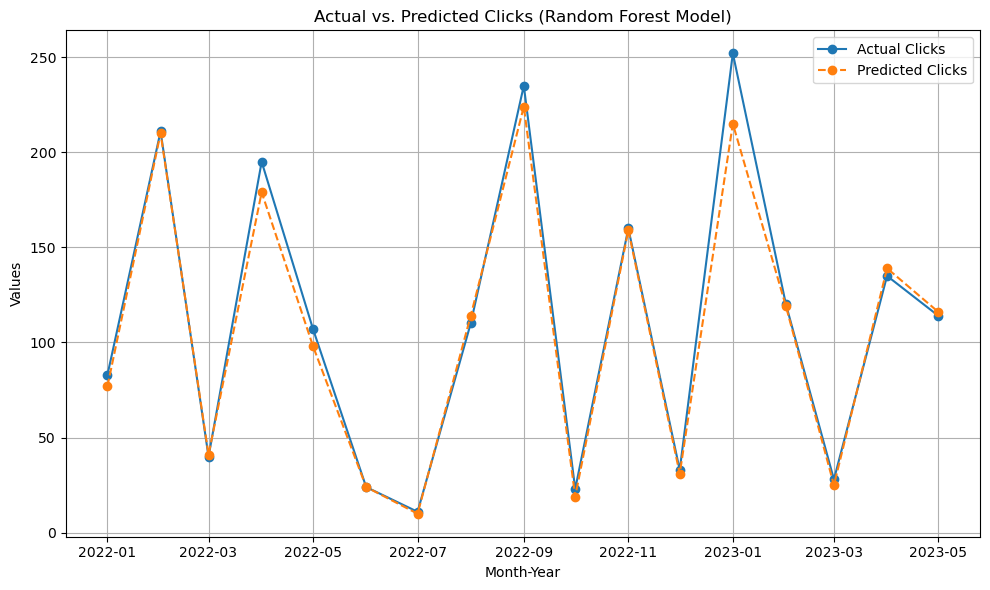

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['actual_clicks'], label='Actual Clicks', marker='o', linestyle='-')
plt.plot(comparison_df.index, comparison_df['predicted_clicks'], label='Predicted Clicks', marker='o', linestyle='--')

# Add labels and legend
plt.xlabel('Month-Year')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Clicks (Random Forest Model)')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pickle
file=open('rf_model.pkl','wb')
pickle.dump(rf_model, file)

In [ ]:
np.expm1(rf_model.predict([[120.899998,402975,np.log(402975)]]))

# Model Deployment

In [1]:
!pip install streamlit
import streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [2]:
#Run on colab
!wget ~q ~O - ipv4.icanhazip.com

--2023-11-05 05:14:47--  http://~q/
Resolving ~q (~q)... failed: Name or service not known.
wget: unable to resolve host address ‘~q’
--2023-11-05 05:14:47--  http://~o/
Resolving ~o (~o)... failed: Name or service not known.
wget: unable to resolve host address ‘~o’
--2023-11-05 05:14:47--  http://-/
Resolving - (-)... failed: Name or service not known.
wget: unable to resolve host address ‘-’
--2023-11-05 05:14:47--  http://ipv4.icanhazip.com/
Resolving ipv4.icanhazip.com (ipv4.icanhazip.com)... 104.18.114.97, 104.18.115.97
Connecting to ipv4.icanhazip.com (ipv4.icanhazip.com)|104.18.114.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14 [text/plain]
Saving to: ‘index.html’

index.html          100%[===================>]      14  --.-KB/s    in 0s      

2023-11-05 05:14:47 (1.63 MB/s) - ‘index.html’ saved [14/14]

FINISHED --2023-11-05 05:14:47--
Total wall clock time: 0.04s
Downloaded: 1 files, 14 in 0s (1.63 MB/s)


In [3]:
!streamlit run stream.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.197.29.191:8501

npx: installed 22 in 4.138s
your url is: https://vast-foxes-dream.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2023-11-05 05:16:31.007 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/stream.py", line 9, in <module>
    model = pickle.load(open('rf_model.pkl','rb'))
_pickle.UnpicklingError: pickle data was truncated
/usr/local/l

In [4]:
scikit-learn --version

NameError: ignored